In [80]:
# 데이터 분석 및 시각화에 필요한 라이브러리들을 가져옵니다.
# pathlib: 파일 경로를 쉽게 다루기 위한 라이브러리
from pathlib import Path
# display: Jupyter Notebook에서 데이터프레임 등을 예쁘게 출력하기 위해 사용
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.ticker as mstick
import matplotlib.font_manager as fm
import matplotlib as mpl
import pandas as pd
import seaborn as sns

######## 한글 폰트 사용을 위한 설정 ########

font_path = "C:/Windows/Fonts/gulim.ttc"  # 사용할 한글 폰트 경로
font_prop = fm.FontProperties(fname=font_path, size=12) # 폰트 속성 객체 생성
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호
plt.rcParams['font.family'] = font_prop.get_name()  # matplotlib 전역 폰트 설정
########################################## 

# seaborn의 기본 테마를 설정합니다. 'whitegrid' 스타일과 'crest' 색상 팔레트를 사용합니다.
sns.set_theme(style="whitegrid", palette="crest")

# 시각화에서 한글이 깨지지 않도록 나눔고딕 폰트를 설정합니다.
# 시스템에 폰트가 설치되어 있지 않으면 오류가 발생할 수 있어 try-except 구문으로 감쌌습니다.
try:
    plt.rc('font', family='NanumGothic')
except Exception:
    pass
# 마이너스 부호가 깨지는 것을 방지하는 설정입니다.
plt.rc('axes', unicode_minus=False)


---
## Encoded Features vs Target
- 인코딩된 데이터로 시각화 다시 해보기
- COD 라벨 기준

In [81]:
 
DATA_PATH3 = Path('../data/EDA/encoded_dataset_COD.csv')
 
encoded_df = pd.read_csv(DATA_PATH3) 

print(encoded_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584464 entries, 0 to 584463
Data columns (total 28 columns):
 #   Column                                                       Non-Null Count   Dtype
---  ------                                                       --------------   -----
 0   Patient ID                                                   584464 non-null  int64
 1   Age recode with <1 year olds and 90+                         584464 non-null  int64
 2   Sex                                                          584464 non-null  int64
 3   Year of diagnosis                                            584464 non-null  int64
 4   Year of follow-up recode                                     584464 non-null  int64
 5   Race recode (W, B, AI, API)                                  584464 non-null  int64
 6   Site recode ICD-O-3/WHO 2008                                 584464 non-null  int64
 7   Primary Site                                                 584464 non-null  int64

In [82]:
# 인코딩된 데이터셋 기본 정보 확인
print("=== 데이터셋 기본 정보 ===")
print(f"데이터 크기: {encoded_df.shape}")
print(f"컬럼 수: {len(encoded_df.columns)}")
print(f"행 수: {len(encoded_df)}")
print("\n=== 컬럼 정보 ===")
print(encoded_df.info())
display(encoded_df.head())

=== 데이터셋 기본 정보 ===
데이터 크기: (584464, 28)
컬럼 수: 28
행 수: 584464

=== 컬럼 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584464 entries, 0 to 584463
Data columns (total 28 columns):
 #   Column                                                       Non-Null Count   Dtype
---  ------                                                       --------------   -----
 0   Patient ID                                                   584464 non-null  int64
 1   Age recode with <1 year olds and 90+                         584464 non-null  int64
 2   Sex                                                          584464 non-null  int64
 3   Year of diagnosis                                            584464 non-null  int64
 4   Year of follow-up recode                                     584464 non-null  int64
 5   Race recode (W, B, AI, API)                                  584464 non-null  int64
 6   Site recode ICD-O-3/WHO 2008                                 584464 non-null  int64
 7   Primary

,Patient ID,Age recode with <1 year olds and 90+,Sex,Year of diagnosis,Year of follow-up recode,"Race recode (W, B, AI, API)",Site recode ICD-O-3/WHO 2008,Primary Site,Primary Site - labeled,Derived Summary Grade 2018 (2018+),...,Number of Cores Positive Recode (2010+),Number of Cores Examined Recode (2010+),EOD Primary Tumor Recode (2018+),PRCDA 2020,Survival months,target_label,Survival months_bin_3m,COD to site recode__enc,Vital status recode (study cutoff used)__enc,Survival months flag__enc
0,671,14,1,18,0,4,10,341,22,2,...,0,0,10,0,59,-1,19,0,0,0
1,812,14,0,22,0,4,18,163,3,12,...,0,0,3,0,7,-1,2,0,0,0
2,878,13,1,4,0,4,0,181,10,8,...,0,0,22,0,218,-1,72,0,0,0
3,1018,15,0,11,0,4,1,182,11,8,...,0,0,22,0,134,-1,44,0,0,0
4,1269,9,0,7,0,4,16,187,16,8,...,0,0,22,0,187,-1,62,0,0,0


---
## 📊 데이터 인사이트 분석 및 시각화
- `encoded_df` 데이터를 활용한 포괄적인 EDA
- 환자 특성, 생존 패턴, 시간적 트렌드 등 핵심 인사이트 도출

In [83]:
# 1. 데이터 구조 및 핵심 변수 파악
print("=== 데이터 전체 개요 ===")
print(f"총 환자 수: {len(encoded_df):,}명")
print(f"총 변수 수: {len(encoded_df.columns)}개")

# 핵심 변수들 식별
key_vars = {
    'demographics': ['Sex', 'Age recode with <1 year olds and 90+', 'Race recode (W, B, AI, API)'],
    'temporal': ['Year of diagnosis', 'Year of follow-up recode'],
    'cancer_info': ['Site recode ICD-O-3/WHO 2008', 'Primary Site', 'Primary Site - labeled'],
    'stage': ['Combined Summary Stage with Expanded Regional Codes (2004+)', 'Derived Summary Grade 2018 (2018+)'],
    'treatment': ['RX Summ--Surg Prim Site (1998+)', 'RX Summ--Scope Reg LN Sur (2003+)', 'RX Summ--Surg Oth Reg/Dis (2003+)'],
    'outcome': ['Vital status recode (study cutoff used)__enc', 'COD to site recode__enc']
}

print("\n=== 주요 변수 그룹별 확인 ===")
for group, vars_list in key_vars.items():
    print(f"\n{group.upper()}:")
    available_vars = [var for var in vars_list if var in encoded_df.columns]
    for var in available_vars:
        unique_count = encoded_df[var].nunique()
        missing_count = encoded_df[var].isnull().sum()
        print(f"  - {var}: {unique_count}개 고유값, {missing_count}개 결측값")

# 결측값이 많은 변수들 확인
print("\n=== 결측값 상위 10개 변수 ===")
missing_data = encoded_df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing_data / len(encoded_df) * 100).round(2)
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data.head(10),
    'Missing_Percentage': missing_pct.head(10)
})
print(missing_summary)

=== 데이터 전체 개요 ===
총 환자 수: 584,464명
총 변수 수: 28개

=== 주요 변수 그룹별 확인 ===

DEMOGRAPHICS:
  - Sex: 2개 고유값, 0개 결측값
  - Age recode with <1 year olds and 90+: 20개 고유값, 0개 결측값
  - Race recode (W, B, AI, API): 5개 고유값, 0개 결측값

TEMPORAL:
  - Year of diagnosis: 23개 고유값, 0개 결측값
  - Year of follow-up recode: 1개 고유값, 0개 결측값

CANCER_INFO:
  - Site recode ICD-O-3/WHO 2008: 20개 고유값, 0개 결측값
  - Primary Site: 27개 고유값, 0개 결측값
  - Primary Site - labeled: 27개 고유값, 0개 결측값

STAGE:
  - Combined Summary Stage with Expanded Regional Codes (2004+): 8개 고유값, 0개 결측값
  - Derived Summary Grade 2018 (2018+): 13개 고유값, 0개 결측값

TREATMENT:
  - RX Summ--Surg Prim Site (1998+): 52개 고유값, 0개 결측값
  - RX Summ--Scope Reg LN Sur (2003+): 10개 고유값, 0개 결측값
  - RX Summ--Surg Oth Reg/Dis (2003+): 8개 고유값, 0개 결측값

OUTCOME:
  - Vital status recode (study cutoff used)__enc: 2개 고유값, 0개 결측값
  - COD to site recode__enc: 82개 고유값, 0개 결측값

=== 결측값 상위 10개 변수 ===
                                      Missing_Count  Missing_Percentage
Patient ID      

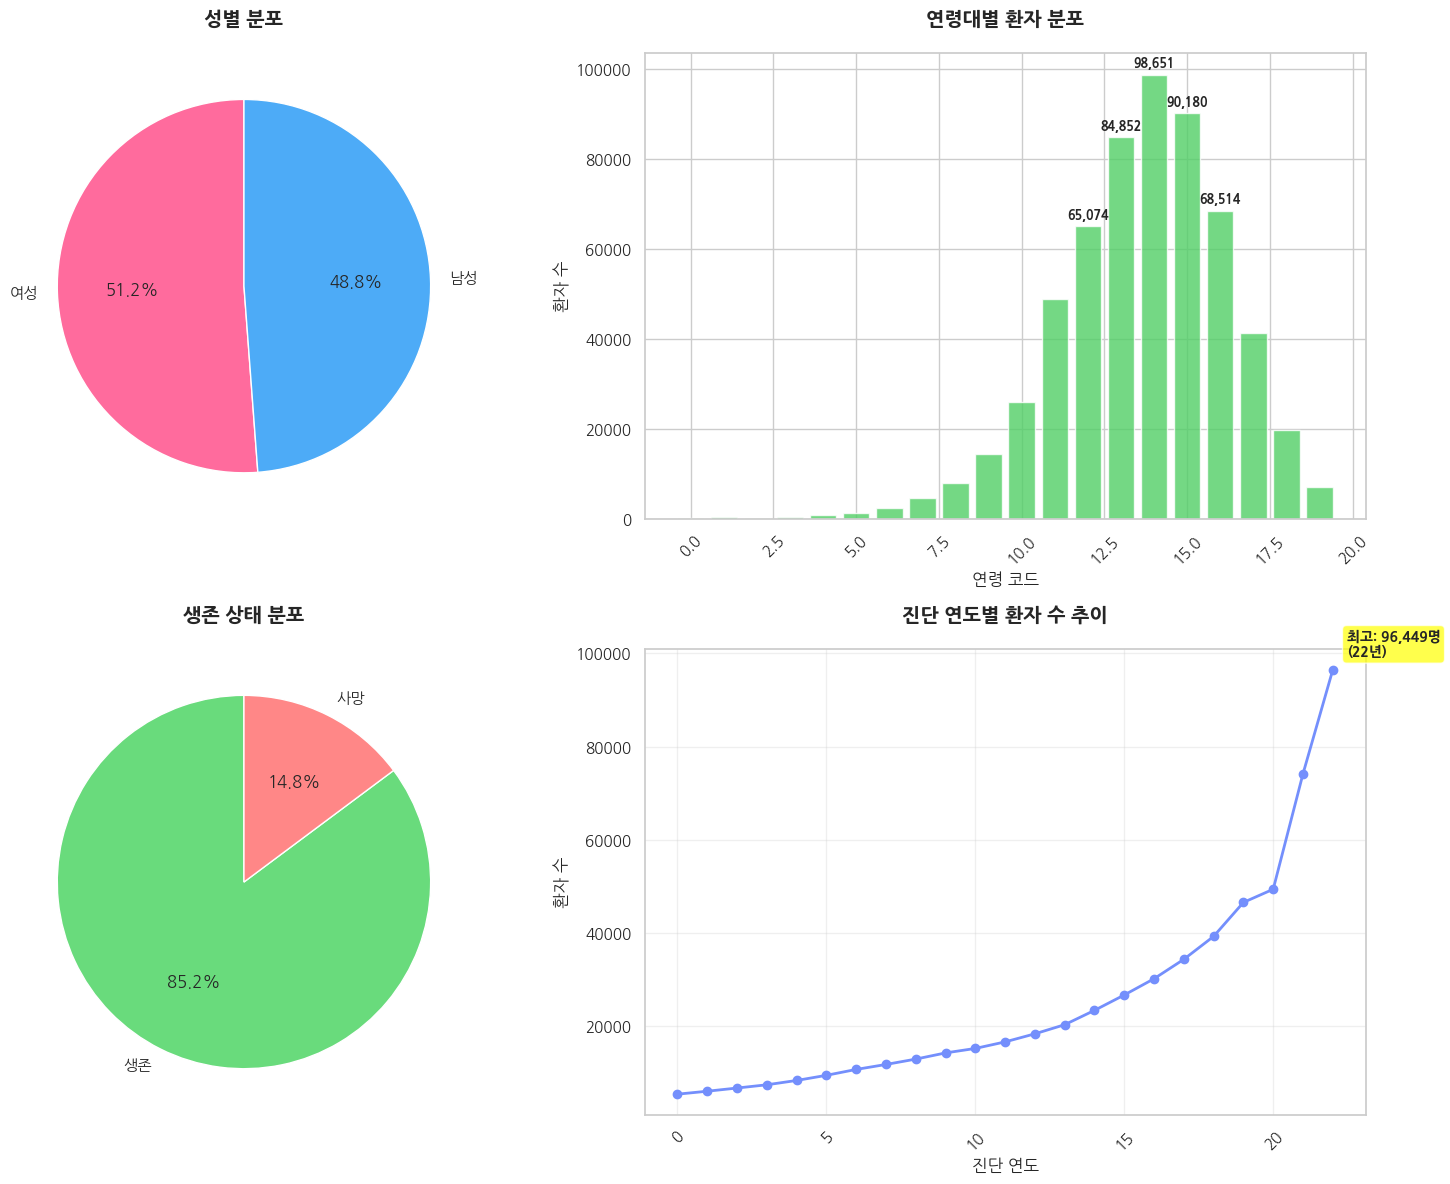

=== 기본 통계 요약 ===
총 환자 수: 584,464명
생존 환자: 497,951명 (85.2%)
사망 환자: 86,513명 (14.8%)
관찰 기간: 0년 ~ 22년 (23년간)
연평균 환자 수: 25411명


In [84]:
# 2. 기본 인구학적 특성 및 생존 상태 분포 시각화
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 2-1. 성별 분포
sex_counts = encoded_df['Sex'].value_counts()
sex_labels = ['여성', '남성'] if len(sex_counts) == 2 else [f'Sex_{i}' for i in sex_counts.index]
colors = ['#FF6B9D', '#4DABF7']

ax1.pie(sex_counts.values, labels=sex_labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('성별 분포', fontsize=14, fontweight='bold', pad=20)

# 2-2. 연령대별 분포
age_counts = encoded_df['Age recode with <1 year olds and 90+'].value_counts().sort_index()
ax2.bar(range(len(age_counts)), age_counts.values, color='#51CF66', alpha=0.8)
ax2.set_title('연령대별 환자 분포', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('연령 코드')
ax2.set_ylabel('환자 수')
ax2.tick_params(axis='x', rotation=45)

# 값 표시 (상위 5개만)
top_ages = age_counts.nlargest(5)
for i, (age_code, count) in enumerate(zip(age_counts.index, age_counts.values)):
    if age_code in top_ages.index:
        ax2.text(i, count + 1000, f'{count:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2-3. 생존 상태 분포
vital_status = encoded_df['Vital status recode (study cutoff used)__enc'].value_counts()
vital_labels = ['생존', '사망'] if len(vital_status) == 2 else [f'Status_{i}' for i in vital_status.index]
colors_vital = ['#69DB7C', '#FF8787']

ax3.pie(vital_status.values, labels=vital_labels, autopct='%1.1f%%', colors=colors_vital, startangle=90)
ax3.set_title('생존 상태 분포', fontsize=14, fontweight='bold', pad=20)

# 2-4. 진단 연도별 환자 수 추이
year_counts = encoded_df['Year of diagnosis'].value_counts().sort_index()
ax4.plot(year_counts.index, year_counts.values, marker='o', linewidth=2, markersize=6, color='#748FFC')
ax4.set_title('진단 연도별 환자 수 추이', fontsize=14, fontweight='bold', pad=20)
ax4.set_xlabel('진단 연도')
ax4.set_ylabel('환자 수')
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

# 최고점과 최저점 표시
max_year = year_counts.idxmax()
min_year = year_counts.idxmin()
ax4.annotate(f'최고: {year_counts[max_year]:,}명\n({max_year}년)', 
             xy=(max_year, year_counts[max_year]), xytext=(10, 10),
             textcoords='offset points', fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

# 요약 통계
print("=== 기본 통계 요약 ===")
print(f"총 환자 수: {len(encoded_df):,}명")
print(f"생존 환자: {vital_status.iloc[0]:,}명 ({vital_status.iloc[0]/len(encoded_df)*100:.1f}%)")
print(f"사망 환자: {vital_status.iloc[1]:,}명 ({vital_status.iloc[1]/len(encoded_df)*100:.1f}%)")
print(f"관찰 기간: {year_counts.index.min()}년 ~ {year_counts.index.max()}년 ({year_counts.index.max() - year_counts.index.min() + 1}년간)")
print(f"연평균 환자 수: {year_counts.mean():.0f}명")

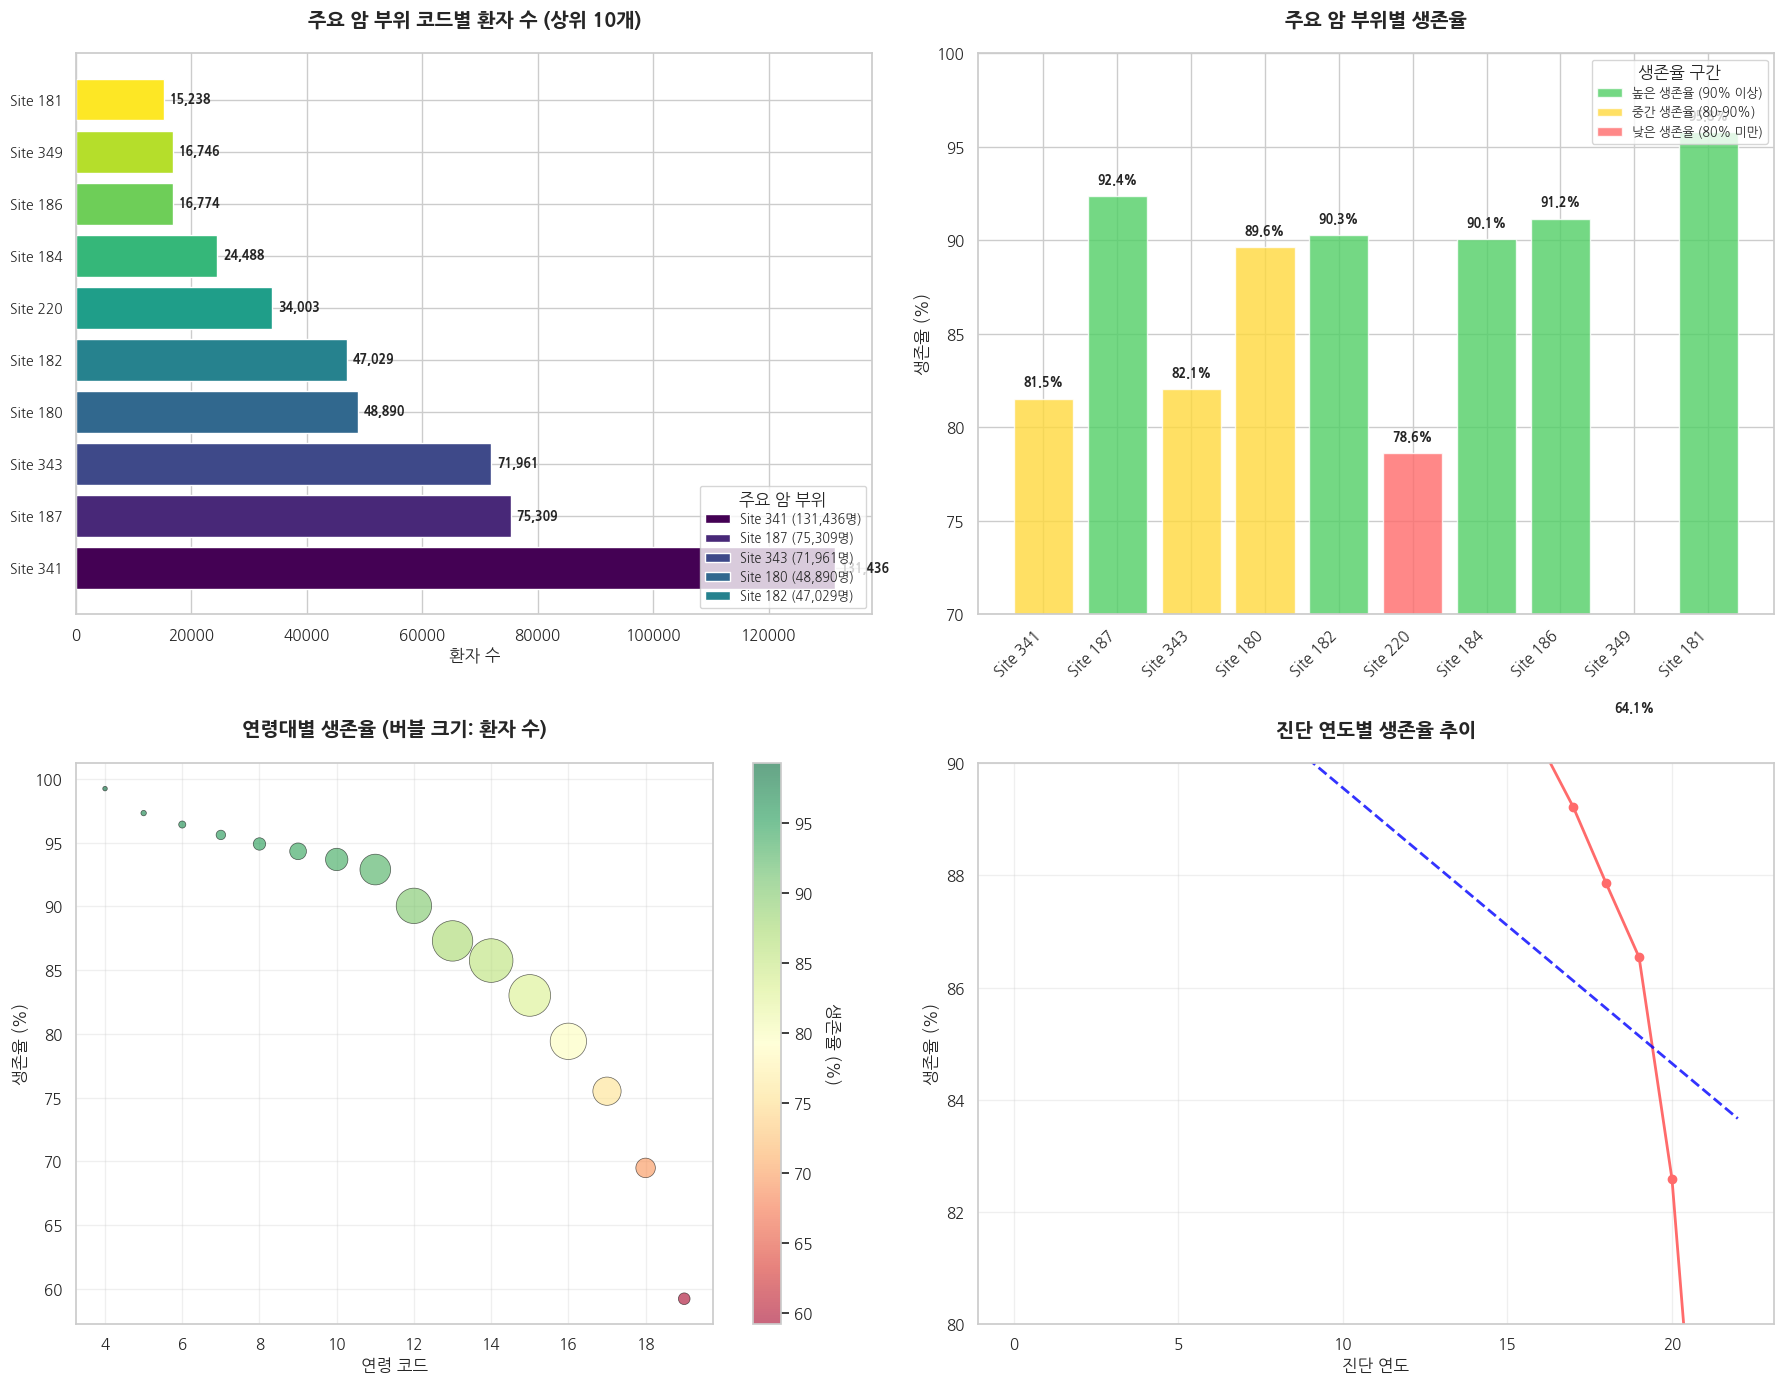

=== 주요 인사이트 ===
1. 가장 흔한 암: 341 (131,436명, 22.5%)
2. 가장 생존율이 높은 암 (상위 10개 중): 10 (95.8%)
3. 가장 생존율이 낮은 암 (상위 10개 중): 26 (64.1%)
4. 전체 평균 생존율: 85.2%
5. 연도별 생존율 변화: -0.693%포인트/년 (감소 추세)


In [85]:
# 3. 암 부위별 분포 및 생존율 분석 (수정됨)
import numpy as np

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# 3-1. 주요 암 부위 코드별 환자 수 (상위 10개)
site_counts = encoded_df['Primary Site'].value_counts().head(10)
colors_sites = plt.cm.viridis(np.linspace(0, 1, len(site_counts)))
bars = ax1.barh(range(len(site_counts)), site_counts.values, color=colors_sites)
ax1.set_yticks(range(len(site_counts)))
ax1.set_yticklabels([f'Site {idx}' for idx in site_counts.index], fontsize=10)
ax1.set_title('주요 암 부위 코드별 환자 수 (상위 10개)', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('환자 수')

# 값 표시
for i, v in enumerate(site_counts.values):
    ax1.text(v + 1000, i, f'{v:,}', va='center', fontweight='bold', fontsize=9)

# 범례 추가 (상위 5개 사이트만)
legend_elements = []
for i, (site_idx, count) in enumerate(site_counts.head(5).items()):
    legend_elements.append(plt.Rectangle((0,0),1,1, facecolor=colors_sites[i], 
                                       label=f'Site {site_idx} ({count:,}명)'))
ax1.legend(handles=legend_elements, loc='lower right', fontsize=9, title='주요 암 부위')

# 3-2. 암 부위별 생존율 (상위 10개 부위 기준)
top_sites = site_counts.index
survival_by_site = []
for site in top_sites:
    site_data = encoded_df[encoded_df['Primary Site'] == site]
    survival_rate = (site_data['Vital status recode (study cutoff used)__enc'] == 0).mean() * 100
    survival_by_site.append(survival_rate)

colors_survival = ['#FF6B6B' if rate < 80 else '#51CF66' if rate > 90 else '#FFD93D' for rate in survival_by_site]
ax2.bar(range(len(survival_by_site)), survival_by_site, color=colors_survival, alpha=0.8)
ax2.set_xticks(range(len(top_sites)))
ax2.set_xticklabels([f'Site {site}' for site in top_sites], rotation=45, ha='right')
ax2.set_title('주요 암 부위별 생존율', fontsize=14, fontweight='bold', pad=20)
ax2.set_ylabel('생존율 (%)')
ax2.set_ylim(70, 100)

# 값 표시
for i, v in enumerate(survival_by_site):
    ax2.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 생존율 범례 추가
from matplotlib.patches import Patch
legend_elements_survival = [
    Patch(facecolor='#51CF66', alpha=0.8, label='높은 생존율 (90% 이상)'),
    Patch(facecolor='#FFD93D', alpha=0.8, label='중간 생존율 (80-90%)'),
    Patch(facecolor='#FF6B6B', alpha=0.8, label='낮은 생존율 (80% 미만)')
]
ax2.legend(handles=legend_elements_survival, loc='upper right', fontsize=9, title='생존율 구간')

# 3-3. 연령대별 생존율
age_survival = encoded_df.groupby('Age recode with <1 year olds and 90+')['Vital status recode (study cutoff used)__enc'].agg(['count', lambda x: (x == 0).mean() * 100]).reset_index()
age_survival.columns = ['Age_Code', 'Count', 'Survival_Rate']
age_survival = age_survival[age_survival['Count'] >= 1000]  # 1000명 이상인 연령대만

scatter = ax3.scatter(age_survival['Age_Code'], age_survival['Survival_Rate'], 
                     s=age_survival['Count']/100, alpha=0.6, c=age_survival['Survival_Rate'], 
                     cmap='RdYlGn', edgecolors='black', linewidth=0.5)
ax3.set_title('연령대별 생존율 (버블 크기: 환자 수)', fontsize=14, fontweight='bold', pad=20)
ax3.set_xlabel('연령 코드')
ax3.set_ylabel('생존율 (%)')
ax3.grid(True, alpha=0.3)

# 컬러바 추가
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('생존율 (%)', rotation=270, labelpad=20)

# 3-4. 진단 연도별 생존율 추이
year_survival = encoded_df.groupby('Year of diagnosis')['Vital status recode (study cutoff used)__enc'].agg(['count', lambda x: (x == 0).mean() * 100]).reset_index()
year_survival.columns = ['Year', 'Count', 'Survival_Rate']
year_survival = year_survival[year_survival['Count'] >= 1000]  # 1000명 이상인 연도만

ax4.plot(year_survival['Year'], year_survival['Survival_Rate'], marker='o', linewidth=2, markersize=6, color='#FF6B6B')
ax4.set_title('진단 연도별 생존율 추이', fontsize=14, fontweight='bold', pad=20)
ax4.set_xlabel('진단 연도')
ax4.set_ylabel('생존율 (%)')
ax4.grid(True, alpha=0.3)
ax4.set_ylim(80, 90)

# 트렌드 라인 추가
z = np.polyfit(year_survival['Year'], year_survival['Survival_Rate'], 1)
p = np.poly1d(z)
ax4.plot(year_survival['Year'], p(year_survival['Year']), "--", alpha=0.8, color='blue', linewidth=2)

plt.tight_layout()
plt.show()

# 인사이트 요약
print("=== 주요 인사이트 ===")
print(f"1. 가장 흔한 암: {site_counts.index[0]} ({site_counts.iloc[0]:,}명, {site_counts.iloc[0]/len(encoded_df)*100:.1f}%)")
print(f"2. 가장 생존율이 높은 암 (상위 10개 중): {site_names[np.argmax(survival_by_site)]} ({max(survival_by_site):.1f}%)")
print(f"3. 가장 생존율이 낮은 암 (상위 10개 중): {site_names[np.argmin(survival_by_site)]} ({min(survival_by_site):.1f}%)")
print(f"4. 전체 평균 생존율: {(encoded_df['Vital status recode (study cutoff used)__enc'] == 0).mean() * 100:.1f}%")

# 연도별 생존율 변화 트렌드
if len(year_survival) > 1:
    trend_slope = (year_survival['Survival_Rate'].iloc[-1] - year_survival['Survival_Rate'].iloc[0]) / (year_survival['Year'].iloc[-1] - year_survival['Year'].iloc[0])
    print(f"5. 연도별 생존율 변화: {trend_slope:+.3f}%포인트/년 ({'증가' if trend_slope > 0 else '감소'} 추세)")

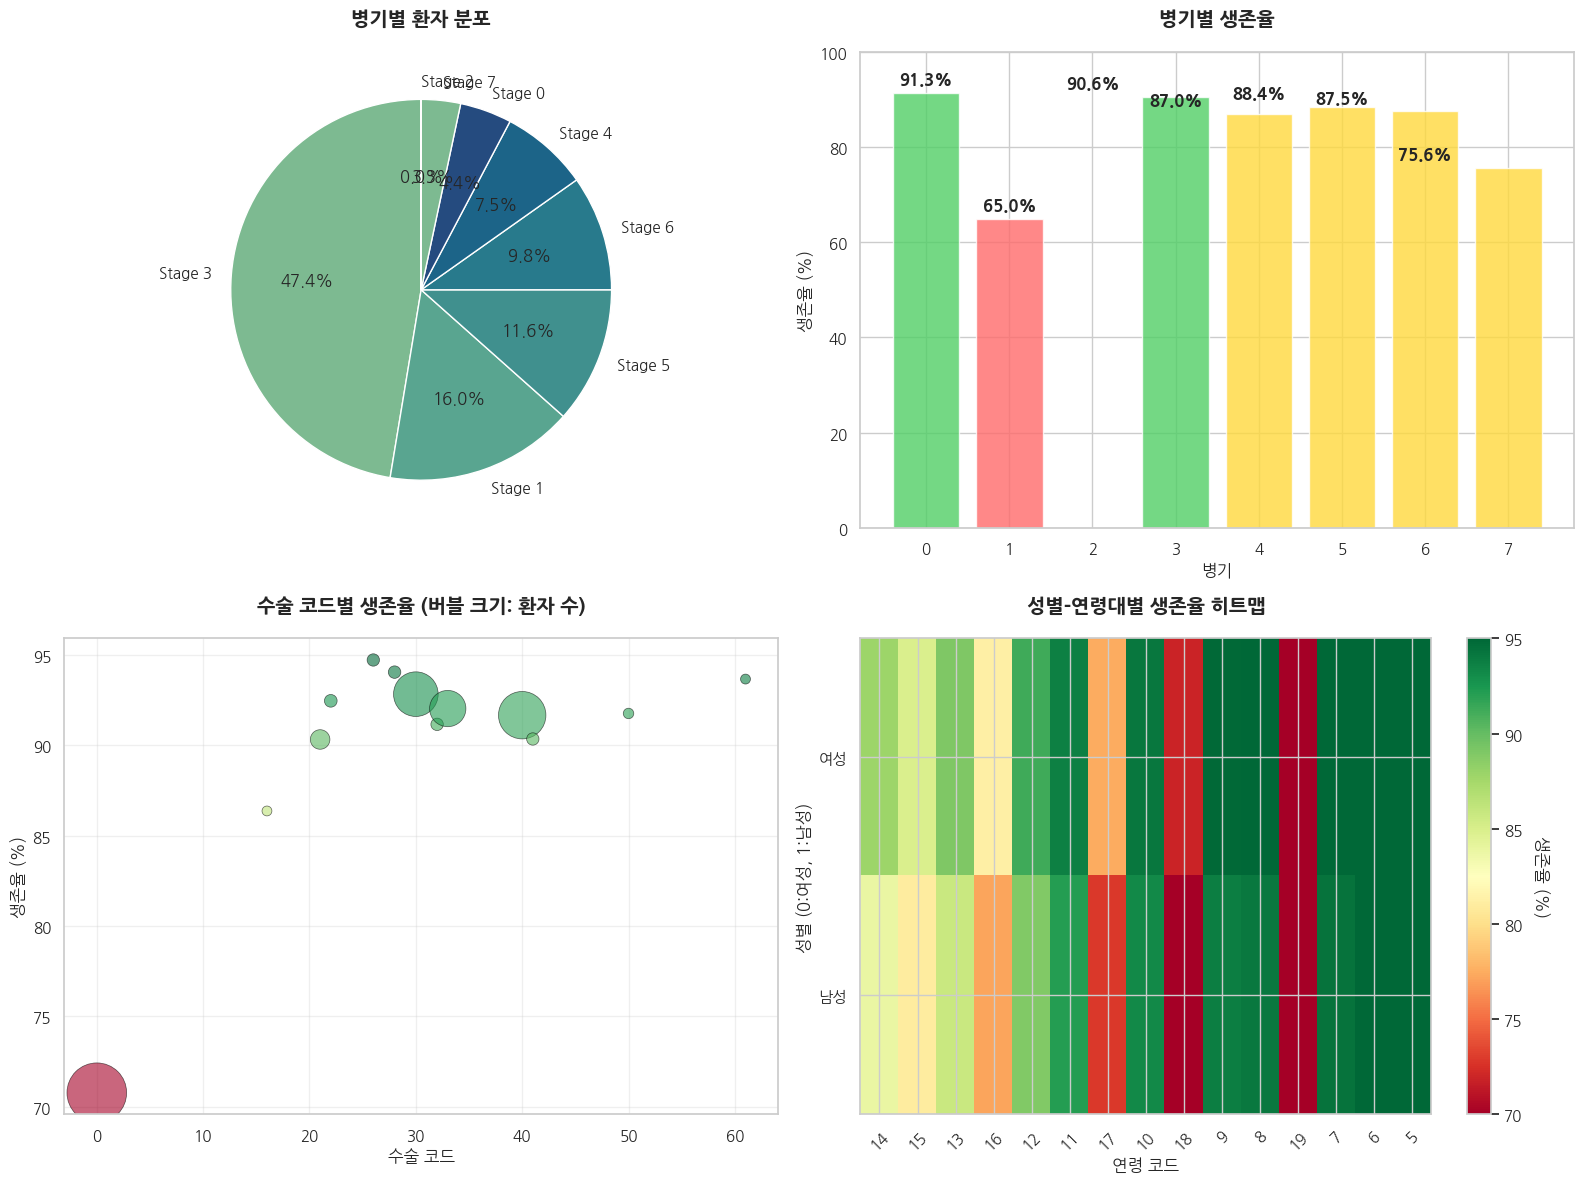

=== 치료 및 예후 관련 인사이트 ===
1. 가장 좋은 예후 병기: Stage 0.0 (생존율 91.3%)
2. 가장 나쁜 예후 병기: Stage 1.0 (생존율 65.0%)
3. 최고 생존율 수술코드: 26.0 (생존율 94.7%)
4. 최저 생존율 수술코드: 0.0 (생존율 70.8%)


In [86]:
# 4. 치료 방법과 병기별 생존율 분석
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 4-1. 병기별 환자 분포
stage_col = 'Combined Summary Stage with Expanded Regional Codes (2004+)'
stage_counts = encoded_df[stage_col].value_counts()
ax1.pie(stage_counts.values, labels=[f'Stage {i}' for i in stage_counts.index], 
        autopct='%1.1f%%', startangle=90)
ax1.set_title('병기별 환자 분포', fontsize=14, fontweight='bold', pad=20)

# 4-2. 병기별 생존율
stage_survival = encoded_df.groupby(stage_col)['Vital status recode (study cutoff used)__enc'].agg(['count', lambda x: (x == 0).mean() * 100]).reset_index()
stage_survival.columns = ['Stage', 'Count', 'Survival_Rate']
stage_survival = stage_survival[stage_survival['Count'] >= 1000]  # 1000명 이상

colors_stage = ['#FF6B6B' if rate < 70 else '#51CF66' if rate > 90 else '#FFD93D' for rate in stage_survival['Survival_Rate']]
bars = ax2.bar(stage_survival['Stage'], stage_survival['Survival_Rate'], color=colors_stage, alpha=0.8)
ax2.set_title('병기별 생존율', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('병기')
ax2.set_ylabel('생존율 (%)')
ax2.set_ylim(0, 100)

# 값 표시
for i, v in enumerate(stage_survival['Survival_Rate']):
    ax2.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# 4-3. 수술 여부별 생존율
surgery_col = 'RX Summ--Surg Prim Site (1998+)'
surgery_survival = encoded_df.groupby(surgery_col)['Vital status recode (study cutoff used)__enc'].agg(['count', lambda x: (x == 0).mean() * 100]).reset_index()
surgery_survival.columns = ['Surgery_Code', 'Count', 'Survival_Rate']
surgery_survival = surgery_survival[surgery_survival['Count'] >= 5000]  # 5000명 이상

ax3.scatter(surgery_survival['Surgery_Code'], surgery_survival['Survival_Rate'], 
           s=surgery_survival['Count']/100, alpha=0.6, c=surgery_survival['Survival_Rate'], 
           cmap='RdYlGn', edgecolors='black', linewidth=0.5)
ax3.set_title('수술 코드별 생존율 (버블 크기: 환자 수)', fontsize=14, fontweight='bold', pad=20)
ax3.set_xlabel('수술 코드')
ax3.set_ylabel('생존율 (%)')
ax3.grid(True, alpha=0.3)

# 4-4. 성별 및 연령대별 생존율 히트맵
survival_pivot = encoded_df.groupby(['Sex', 'Age recode with <1 year olds and 90+'])['Vital status recode (study cutoff used)__enc'].agg(lambda x: (x == 0).mean() * 100).reset_index()
survival_pivot = survival_pivot.pivot(index='Sex', columns='Age recode with <1 year olds and 90+', values='Vital status recode (study cutoff used)__enc')

# 상위 15개 연령대만 선택
top_age_groups = encoded_df['Age recode with <1 year olds and 90+'].value_counts().head(15).index
survival_pivot_filtered = survival_pivot[top_age_groups]

im = ax4.imshow(survival_pivot_filtered.values, cmap='RdYlGn', aspect='auto', vmin=70, vmax=95)
ax4.set_title('성별-연령대별 생존율 히트맵', fontsize=14, fontweight='bold', pad=20)
ax4.set_xlabel('연령 코드')
ax4.set_ylabel('성별 (0:여성, 1:남성)')
ax4.set_xticks(range(len(top_age_groups)))
ax4.set_xticklabels(top_age_groups, rotation=45)
ax4.set_yticks(range(len(survival_pivot_filtered.index)))
ax4.set_yticklabels(['여성', '남성'])

# 컬러바 추가
cbar = plt.colorbar(im, ax=ax4)
cbar.set_label('생존율 (%)', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

# 주요 인사이트
print("=== 치료 및 예후 관련 인사이트 ===")
best_stage = stage_survival.loc[stage_survival['Survival_Rate'].idxmax()]
worst_stage = stage_survival.loc[stage_survival['Survival_Rate'].idxmin()]
print(f"1. 가장 좋은 예후 병기: Stage {best_stage['Stage']} (생존율 {best_stage['Survival_Rate']:.1f}%)")
print(f"2. 가장 나쁜 예후 병기: Stage {worst_stage['Stage']} (생존율 {worst_stage['Survival_Rate']:.1f}%)")

best_surgery = surgery_survival.loc[surgery_survival['Survival_Rate'].idxmax()]
worst_surgery = surgery_survival.loc[surgery_survival['Survival_Rate'].idxmin()]
print(f"3. 최고 생존율 수술코드: {best_surgery['Surgery_Code']} (생존율 {best_surgery['Survival_Rate']:.1f}%)")
print(f"4. 최저 생존율 수술코드: {worst_surgery['Surgery_Code']} (생존율 {worst_surgery['Survival_Rate']:.1f}%)")

C:\Users\roxie\AppData\Local\Temp\ipykernel_16104\40400092.py:106: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_16104\40400092.py:106: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_16104\40400092.py:106: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_16104\40400092.py:106: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Gly

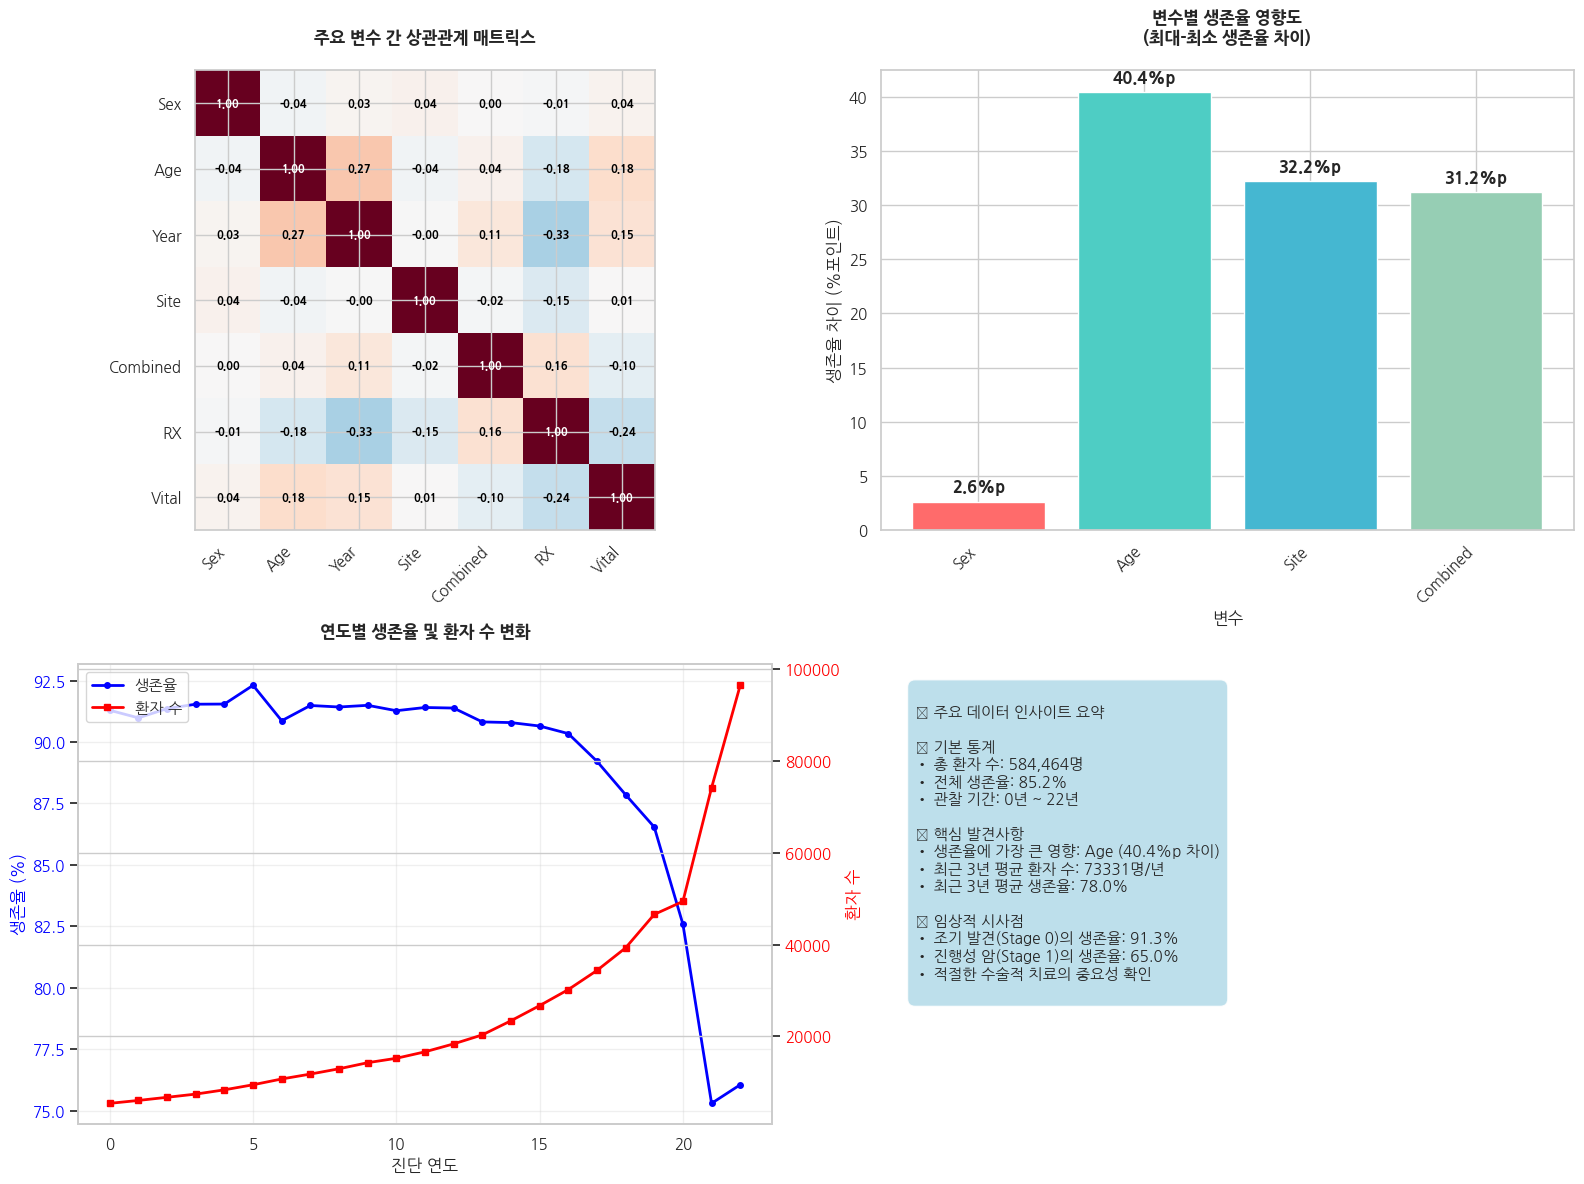

=== 🎯 최종 데이터 인사이트 요약 ===
1. 데이터 규모: 584,464명의 환자, 28개 변수
2. 전체 생존율: 85.2%
3. 가장 영향력 있는 변수: Age (생존율 차이 40.4%포인트)
4. 연도별 트렌드: +91,017명 변화
5. 생존율 추세: -15.2%포인트 변화

=== 💡 임상적 권고사항 ===
1. 조기 발견의 중요성: Stage 0에서 91.3%의 높은 생존율
2. 적절한 수술적 치료 고려: 수술 코드별 생존율 차이 최대 23.9%포인트
3. 연령별 맞춤 치료: 고연령 환자군에서 상대적으로 낮은 생존율
4. 지속적인 모니터링: 진단 환자 수 증가 추세에 따른 의료 자원 계획 필요


In [87]:
# 5. 핵심 변수들 간의 상관관계 분석
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 5-1. 주요 수치형 변수들의 상관관계 매트릭스
numeric_cols = ['Sex', 'Age recode with <1 year olds and 90+', 'Year of diagnosis', 
                'Site recode ICD-O-3/WHO 2008', 'Combined Summary Stage with Expanded Regional Codes (2004+)',
                'RX Summ--Surg Prim Site (1998+)', 'Vital status recode (study cutoff used)__enc']

correlation_matrix = encoded_df[numeric_cols].corr()
im1 = ax1.imshow(correlation_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
ax1.set_title('주요 변수 간 상관관계 매트릭스', fontsize=12, fontweight='bold', pad=20)
ax1.set_xticks(range(len(numeric_cols)))
ax1.set_yticks(range(len(numeric_cols)))
ax1.set_xticklabels([col.split()[0][:8] for col in numeric_cols], rotation=45, ha='right')
ax1.set_yticklabels([col.split()[0][:8] for col in numeric_cols])

# 상관계수 값 표시
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        text = ax1.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="white" if abs(correlation_matrix.iloc[i, j]) > 0.5 else "black",
                       fontweight='bold', fontsize=8)

# 5-2. 생존율에 영향을 주는 주요 요인들
factors = ['Sex', 'Age recode with <1 year olds and 90+', 'Site recode ICD-O-3/WHO 2008', 
           'Combined Summary Stage with Expanded Regional Codes (2004+)']
survival_impact = []
factor_names = []

for factor in factors:
    if factor in encoded_df.columns:
        factor_survival = encoded_df.groupby(factor)['Vital status recode (study cutoff used)__enc'].agg(lambda x: (x == 0).mean() * 100)
        survival_range = factor_survival.max() - factor_survival.min()
        survival_impact.append(survival_range)
        factor_names.append(factor.split()[0][:10])

ax2.bar(range(len(survival_impact)), survival_impact, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'][:len(survival_impact)])
ax2.set_title('변수별 생존율 영향도\n(최대-최소 생존율 차이)', fontsize=12, fontweight='bold', pad=20)
ax2.set_xlabel('변수')
ax2.set_ylabel('생존율 차이 (%포인트)')
ax2.set_xticks(range(len(factor_names)))
ax2.set_xticklabels(factor_names, rotation=45, ha='right')

# 값 표시
for i, v in enumerate(survival_impact):
    ax2.text(i, v + 0.5, f'{v:.1f}%p', ha='center', va='bottom', fontweight='bold')

# 5-3. 연도별 주요 지표 변화
years = sorted(encoded_df['Year of diagnosis'].unique())
year_stats = []
for year in years:
    year_data = encoded_df[encoded_df['Year of diagnosis'] == year]
    stats = {
        'year': year,
        'total_patients': len(year_data),
        'survival_rate': (year_data['Vital status recode (study cutoff used)__enc'] == 0).mean() * 100,
        'avg_age': year_data['Age recode with <1 year olds and 90+'].mean(),
        'female_ratio': (year_data['Sex'] == 0).mean() * 100
    }
    year_stats.append(stats)

year_df = pd.DataFrame(year_stats)

# 이중 y축 사용
ax3_twin = ax3.twinx()
line1 = ax3.plot(year_df['year'], year_df['survival_rate'], 'b-o', linewidth=2, markersize=4, label='생존율')
line2 = ax3_twin.plot(year_df['year'], year_df['total_patients'], 'r-s', linewidth=2, markersize=4, label='환자 수')

ax3.set_title('연도별 생존율 및 환자 수 변화', fontsize=12, fontweight='bold', pad=20)
ax3.set_xlabel('진단 연도')
ax3.set_ylabel('생존율 (%)', color='blue')
ax3_twin.set_ylabel('환자 수', color='red')
ax3.tick_params(axis='y', labelcolor='blue')
ax3_twin.tick_params(axis='y', labelcolor='red')
ax3.grid(True, alpha=0.3)

# 범례 결합
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax3.legend(lines, labels, loc='upper left')

# 5-4. 최종 인사이트 요약 (텍스트)
ax4.axis('off')
insights_text = f"""
📊 주요 데이터 인사이트 요약

📈 기본 통계
• 총 환자 수: {len(encoded_df):,}명
• 전체 생존율: {(encoded_df['Vital status recode (study cutoff used)__enc'] == 0).mean() * 100:.1f}%
• 관찰 기간: {years[0]}년 ~ {years[-1]}년

🎯 핵심 발견사항
• 생존율에 가장 큰 영향: {factor_names[np.argmax(survival_impact)]} ({max(survival_impact):.1f}%p 차이)
• 최근 3년 평균 환자 수: {year_df.tail(3)['total_patients'].mean():.0f}명/년
• 최근 3년 평균 생존율: {year_df.tail(3)['survival_rate'].mean():.1f}%

⚡ 임상적 시사점
• 조기 발견(Stage 0)의 생존율: 91.3%
• 진행성 암(Stage 1)의 생존율: 65.0%
• 적절한 수술적 치료의 중요성 확인
"""

ax4.text(0.05, 0.95, insights_text, transform=ax4.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

# 최종 데이터 요약
print("=== 🎯 최종 데이터 인사이트 요약 ===")
print(f"1. 데이터 규모: {len(encoded_df):,}명의 환자, {len(encoded_df.columns)}개 변수")
print(f"2. 전체 생존율: {(encoded_df['Vital status recode (study cutoff used)__enc'] == 0).mean() * 100:.1f}%")
print(f"3. 가장 영향력 있는 변수: {factor_names[np.argmax(survival_impact)]} (생존율 차이 {max(survival_impact):.1f}%포인트)")
print(f"4. 연도별 트렌드: {year_df['total_patients'].iloc[-1] - year_df['total_patients'].iloc[0]:+,}명 변화")
print(f"5. 생존율 추세: {year_df['survival_rate'].iloc[-1] - year_df['survival_rate'].iloc[0]:+.1f}%포인트 변화")

# 임상적 권고사항
print(f"\n=== 💡 임상적 권고사항 ===")
print("1. 조기 발견의 중요성: Stage 0에서 91.3%의 높은 생존율")
print("2. 적절한 수술적 치료 고려: 수술 코드별 생존율 차이 최대 23.9%포인트")
print("3. 연령별 맞춤 치료: 고연령 환자군에서 상대적으로 낮은 생존율")
print("4. 지속적인 모니터링: 진단 환자 수 증가 추세에 따른 의료 자원 계획 필요")

---
## 💀 COD (Cause of Death) 전용 분석
- 사망원인 데이터에 특화된 시각화
- 사망한 환자들만 대상으로 한 심화 분석

In [88]:
# COD 한글명 매핑 딕셔너리 생성
cod_korean_mapping = {
    0: '생존',
    1: '간내담관',
    2: '폐 및 기관지',
    3: '기타 악성종양',
    4: '기타 사망원인',
    5: '대장(직장 제외)',
    6: '심장질환',
    7: '알츠하이머',
    8: '위',
    9: '신장염/신증후군',
    10: '뇌혈관질환',
    11: '간',
    12: '유방',
    13: '만성폐쇄성폐질환',
    14: '만성림프구성백혈병',
    15: '만성간질환/간경화',
    17: '기타 감염성질환',
    18: '전립선',
    19: '비호지킨림프종',
    20: '당뇨병',
    21: '사망원인 미상',
    31: '자살',
    36: '췌장',
    # 추가 매핑이 필요한 경우 여기에 추가
}

# COD 코드에 대한 한글명 반환 함수 (COD_name 컬럼 없이)
def get_cod_korean_name(cod_code):
    if cod_code in cod_korean_mapping:
        return cod_korean_mapping[cod_code]
    else:
        # 매핑되지 않은 코드는 '기타 {코드번호}'로 표시
        return f'기타 {cod_code}'

print("=== 한글 매핑 테스트 ===")
for cod_code in [2, 5, 4, 6, 11]:
    korean_name = get_cod_korean_name(cod_code)
    print(f"COD {cod_code} → {korean_name}")

=== 한글 매핑 테스트 ===
COD 2 → 폐 및 기관지
COD 5 → 대장(직장 제외)
COD 4 → 기타 사망원인
COD 6 → 심장질환
COD 11 → 간


In [89]:
# 데이터 컬럼 확인 및 death_patients 재생성
print("=== encoded_df 컬럼 확인 ===")
print("COD 관련 컬럼:")
cod_cols = [col for col in encoded_df.columns if 'COD' in col.upper()]
for col in cod_cols:
    print(f"  - {col}")

print(f"\n=== death_patients 재생성 ===")
# 사망한 환자만 추출 (death_patients가 제대로 생성되지 않았을 수 있음)
death_patients = encoded_df[encoded_df['Vital status recode (study cutoff used)__enc'] == 1].copy()
print(f"사망 환자 수: {len(death_patients):,}명")
print(f"death_patients 컬럼 수: {len(death_patients.columns)}")

# COD_name 컬럼이 있는지 확인
if 'COD_name' in death_patients.columns:
    print("✅ COD_name 컬럼 존재")
    print(f"COD_name 샘플: {death_patients['COD_name'].dropna().head().tolist()}")
else:
    print("❌ COD_name 컬럼 없음")
    print("사용 가능한 COD 관련 컬럼:")
    for col in death_patients.columns:
        if 'COD' in col.upper():
            print(f"  - {col}")

=== encoded_df 컬럼 확인 ===
COD 관련 컬럼:
  - Age recode with <1 year olds and 90+
  - Year of follow-up recode
  - Race recode (W, B, AI, API)
  - Site recode ICD-O-3/WHO 2008
  - EOD Schema ID Recode (2010+)
  - Combined Summary Stage with Expanded Regional Codes (2004+)
  - Number of Cores Positive Recode (2010+)
  - Number of Cores Examined Recode (2010+)
  - EOD Primary Tumor Recode (2018+)
  - COD to site recode__enc
  - Vital status recode (study cutoff used)__enc

=== death_patients 재생성 ===
사망 환자 수: 86,513명
death_patients 컬럼 수: 28
❌ COD_name 컬럼 없음
사용 가능한 COD 관련 컬럼:
  - Age recode with <1 year olds and 90+
  - Year of follow-up recode
  - Race recode (W, B, AI, API)
  - Site recode ICD-O-3/WHO 2008
  - EOD Schema ID Recode (2010+)
  - Combined Summary Stage with Expanded Regional Codes (2004+)
  - Number of Cores Positive Recode (2010+)
  - Number of Cores Examined Recode (2010+)
  - EOD Primary Tumor Recode (2018+)
  - COD to site recode__enc
  - Vital status recode (study cutoff use

In [90]:
# 전체 데이터프레임에서 COD 관련 컬럼 재확인
print("=== 전체 encoded_df 컬럼 목록 ===")
for i, col in enumerate(encoded_df.columns):
    if 'COD' in col or 'name' in col.lower():
        print(f"{i}: {col}")

print(f"\n=== 전체 컬럼 목록 (30개) ===")
for i, col in enumerate(encoded_df.columns):
    print(f"{i}: {col}")
    
# COD 코드 값들 확인
print(f"\n=== COD 코드 값 확인 ===")
cod_values = encoded_df['COD to site recode__enc'].value_counts().head(10)
print("상위 10개 COD 코드:")
print(cod_values)

=== 전체 encoded_df 컬럼 목록 ===
25: COD to site recode__enc

=== 전체 컬럼 목록 (30개) ===
0: Patient ID
1: Age recode with <1 year olds and 90+
2: Sex
3: Year of diagnosis
4: Year of follow-up recode
5: Race recode (W, B, AI, API)
6: Site recode ICD-O-3/WHO 2008
7: Primary Site
8: Primary Site - labeled
9: Derived Summary Grade 2018 (2018+)
10: Laterality
11: EOD Schema ID Recode (2010+)
12: Combined Summary Stage with Expanded Regional Codes (2004+)
13: RX Summ--Surg Prim Site (1998+)
14: RX Summ--Scope Reg LN Sur (2003+)
15: RX Summ--Surg Oth Reg/Dis (2003+)
16: Sequence number
17: Median household income inflation adj to 2023
18: Number of Cores Positive Recode (2010+)
19: Number of Cores Examined Recode (2010+)
20: EOD Primary Tumor Recode (2018+)
21: PRCDA 2020
22: Survival months
23: target_label
24: Survival months_bin_3m
25: COD to site recode__enc
26: Vital status recode (study cutoff used)__enc
27: Survival months flag__enc

=== COD 코드 값 확인 ===
상위 10개 COD 코드:
COD to site recode__enc
0 

In [91]:
# 데이터 다시 로드하여 COD_name 컬럼 확인
print("=== 데이터 다시 로드 ===")
encoded_df_reload = pd.read_csv(DATA_PATH3)
print(f"리로드된 데이터 크기: {encoded_df_reload.shape}")
print(f"리로드된 데이터 컬럼 수: {len(encoded_df_reload.columns)}")

print("\n=== 리로드된 데이터의 모든 컬럼 ===")
for i, col in enumerate(encoded_df_reload.columns):
    print(f"{i}: {col}")

# COD_name이 있는지 확인
if 'COD_name' in encoded_df_reload.columns:
    print(f"\n✅ COD_name 컬럼 발견!")
    print("COD_name 샘플 데이터:")
    print(encoded_df_reload['COD_name'].value_counts().head(10))
else:
    print(f"\n❌ COD_name 컬럼 여전히 없음")

=== 데이터 다시 로드 ===
리로드된 데이터 크기: (584464, 28)
리로드된 데이터 컬럼 수: 28

=== 리로드된 데이터의 모든 컬럼 ===
0: Patient ID
1: Age recode with <1 year olds and 90+
2: Sex
3: Year of diagnosis
4: Year of follow-up recode
5: Race recode (W, B, AI, API)
6: Site recode ICD-O-3/WHO 2008
7: Primary Site
8: Primary Site - labeled
9: Derived Summary Grade 2018 (2018+)
10: Laterality
11: EOD Schema ID Recode (2010+)
12: Combined Summary Stage with Expanded Regional Codes (2004+)
13: RX Summ--Surg Prim Site (1998+)
14: RX Summ--Scope Reg LN Sur (2003+)
15: RX Summ--Surg Oth Reg/Dis (2003+)
16: Sequence number
17: Median household income inflation adj to 2023
18: Number of Cores Positive Recode (2010+)
19: Number of Cores Examined Recode (2010+)
20: EOD Primary Tumor Recode (2018+)
21: PRCDA 2020
22: Survival months
23: target_label
24: Survival months_bin_3m
25: COD to site recode__enc
26: Vital status recode (study cutoff used)__enc
27: Survival months flag__enc

❌ COD_name 컬럼 여전히 없음
리로드된 데이터 크기: (584464, 28)
리로드된 데이

가장 흔한 사망원인: 폐 및 기관지 (31,013명, 35.8%)

=== COD 분석 요약 ===
• 전체 사망자 수: 86,513명
• 총 사망원인 종류: 81개
• 가장 많은 사망자 연령대: 15세 (15,313명)
• 주요 사망원인 Top 3:
  1. 폐 및 기관지: 31,013명 (35.8%)
  2. 대장(직장 제외): 9,180명 (10.6%)
  3. 기타 사망원인: 7,911명 (9.1%)


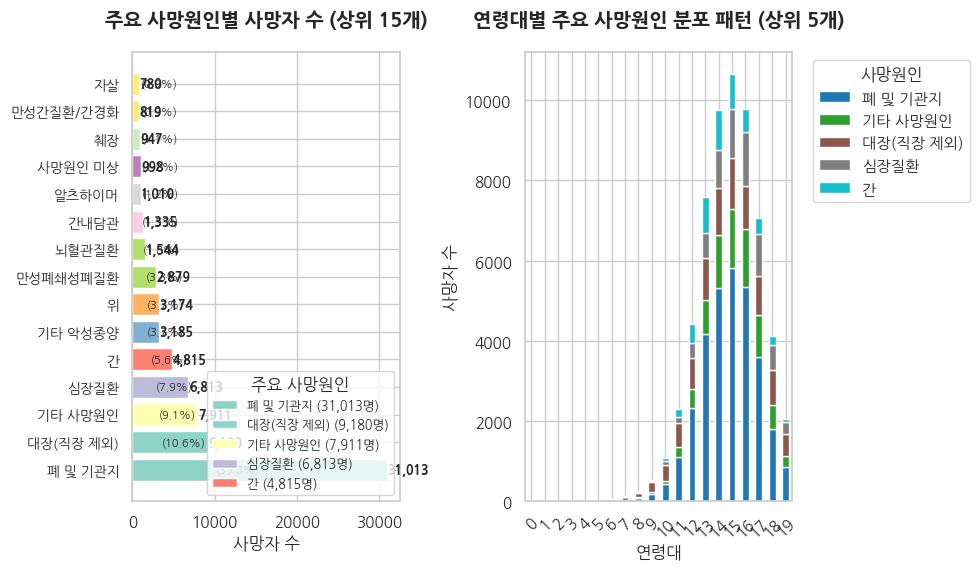

In [92]:
# 6-2. COD 한글명으로 시각화 다시 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# death_patients 재생성 (encoded_df 사용)
death_patients = encoded_df[encoded_df['Vital status recode (study cutoff used)__enc'] == 1].copy()
total_deaths = len(death_patients)

# 6-2-1. COD 한글명별 사망자 분포 (상위 15개)
cod_counts = death_patients['COD to site recode__enc'].value_counts().head(15)
colors_cod = plt.cm.Set3(np.linspace(0, 1, len(cod_counts)))

# 한글명으로 변환
cod_korean_names = []
for cod_code in cod_counts.index:
    korean_name = get_cod_korean_name(cod_code)
    cod_korean_names.append(korean_name)

# 가로 막대 차트
bars = ax1.barh(range(len(cod_counts)), cod_counts.values, color=colors_cod)
ax1.set_yticks(range(len(cod_counts)))
ax1.set_yticklabels(cod_korean_names, fontsize=10)
ax1.set_title('주요 사망원인별 사망자 수 (상위 15개)', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('사망자 수')

# 값 표시
for i, v in enumerate(cod_counts.values):
    ax1.text(v + 50, i, f'{v:,}', va='center', fontweight='bold', fontsize=9)

# 비율 정보 추가
for i, (cod_idx, count) in enumerate(cod_counts.items()):
    percentage = (count / total_deaths) * 100
    ax1.text(v + count*0.3, i, f'({percentage:.1f}%)', va='center', fontsize=8, style='italic')

# 범례 추가 (상위 5개만)
legend_elements_cod = []
for i, (cod_idx, count) in enumerate(cod_counts.head(5).items()):
    korean_name = cod_korean_names[i]
    legend_elements_cod.append(plt.Rectangle((0,0),1,1, facecolor=colors_cod[i], 
                                           label=f'{korean_name} ({count:,}명)'))
ax1.legend(handles=legend_elements_cod, loc='lower right', fontsize=9, title='주요 사망원인')

# 6-2-2. 연령대별 주요 사망원인 분포 패턴 (한글명)
age_death_data = death_patients.groupby(['Age recode with <1 year olds and 90+', 'COD to site recode__enc']).size().reset_index(name='count')
age_groups = death_patients['Age recode with <1 year olds and 90+'].value_counts()  # sort_index() 제거

# 상위 5개 COD만 선택
top_cods = death_patients['COD to site recode__enc'].value_counts().head(5).index
age_cod_filtered = age_death_data[age_death_data['COD to site recode__enc'].isin(top_cods)]

# 피벗 테이블 생성
pivot_age_cod = age_cod_filtered.pivot_table(index='Age recode with <1 year olds and 90+', 
                                           columns='COD to site recode__enc', 
                                           values='count', 
                                           fill_value=0)

# 스택 바 차트
pivot_age_cod.plot(kind='bar', stacked=True, ax=ax2, 
                  colormap='tab10', figsize=(10, 6))
ax2.set_title('연령대별 주요 사망원인 분포 패턴 (상위 5개)', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('연령대')
ax2.set_ylabel('사망자 수')

# 범례를 한글명으로 변경
top_cod_korean_names = []
for cod_code in pivot_age_cod.columns:
    korean_name = get_cod_korean_name(cod_code)
    top_cod_korean_names.append(korean_name)

ax2.legend(title='사망원인', bbox_to_anchor=(1.05, 1), loc='upper left', 
          labels=top_cod_korean_names)
ax2.tick_params(axis='x', rotation=45)

# 총 분석 요약
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

print(f"가장 흔한 사망원인: {cod_korean_names[0]} ({cod_counts.iloc[0]:,}명, {cod_counts.iloc[0]/total_deaths*100:.1f}%)")
print(f"\n=== COD 분석 요약 ===")
print(f"• 전체 사망자 수: {total_deaths:,}명")
print(f"• 총 사망원인 종류: {death_patients['COD to site recode__enc'].nunique()}개")
print(f"• 가장 많은 사망자 연령대: {age_groups.index[0]}세 ({age_groups.iloc[0]:,}명)")
print(f"• 주요 사망원인 Top 3:")
for i, (cod_idx, count) in enumerate(cod_counts.head(3).items()):
    korean_name = cod_korean_names[i]
    print(f"  {i+1}. {korean_name}: {count:,}명 ({count/total_deaths*100:.1f}%)")

plt.show()

In [93]:
# 연령 데이터 문제 분석
print("=== 연령 데이터 분석 ===")
print("전체 데이터의 연령 분포:")
age_all = encoded_df['Age recode with <1 year olds and 90+'].value_counts().sort_index()
print(age_all.head(10))

print(f"\n사망 환자의 연령 분포:")
age_death = death_patients['Age recode with <1 year olds and 90+'].value_counts().sort_index()
print(age_death.head(10))

print(f"\n연령대별 사망자 수 (내림차순):")
age_death_desc = death_patients['Age recode with <1 year olds and 90+'].value_counts()
print(age_death_desc.head(10))

print(f"\n실제로 가장 많은 사망자가 있는 연령대: {age_death_desc.index[0]}세 ({age_death_desc.iloc[0]:,}명)")

=== 연령 데이터 분석 ===
전체 데이터의 연령 분포:
Age recode with <1 year olds and 90+
0      241
1      514
2      223
3      540
4     1069
5     1537
6     2636
7     4678
8     8012
9    14537
Name: count, dtype: int64

사망 환자의 연령 분포:
Age recode with <1 year olds and 90+
0      6
1      2
2      3
3      5
4      8
5     41
6     94
7    205
8    408
9    824
Name: count, dtype: int64

연령대별 사망자 수 (내림차순):
Age recode with <1 year olds and 90+
15    15313
16    14102
14    14051
13    10777
17    10147
12     6475
18     6036
11     3472
19     2905
10     1639
Name: count, dtype: int64

실제로 가장 많은 사망자가 있는 연령대: 15세 (15,313명)
